<a href="https://colab.research.google.com/github/aariyan2001/Assingment_1_letsupgrade_Day_1/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#Hello world to neural network (A simple neural network to find relationship between x and y)

In [ ]:
import numpy as np
xs = np.array([-1.0,0.0,1.0,2.0,3.0,4.0], dtype=float)
ys = np.array([-3.0,-1.0,1.0,3.0,5.0,7.0], dtype=float)


In [ ]:
import tensorflow as tf
from tensorflow import keras
#we have only one layer here
model = keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer="sgd" , loss = "mean_squared_error")
model.fit(xs,ys, epochs=500)  #epoches 500 means it goes through the training loop 500 times
print(model.predict([10.0]))


In [19]:
#Using fashion-MINIST clothes dataset to make a neural network.

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Label: 9

Image Pixel Array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3 

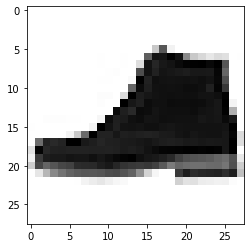

In [26]:
#code to visualize the image with its pixel values who is ranging from 0-255

import numpy as np
import matplotlib.pyplot as plt

#you can put the image index here since we have 60,000 images so the index will be from 0 - 59999
index = 42

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

#Print the label and image
print(f'Label: {train_labels[index]}')
print(f'\nImage Pixel Array:\n {train_images[index]}')

# Visualize the image
plt.imshow(train_images[index], cmap="Greys")


In [27]:
#since neural network works better with normalized data so we will normalize the pixel value from 0-255 to between 0-1
train_images = train_images/255.0
test_images = test_images/255.0 

In [28]:
#now we have three layers in sequential 
#model = keras.Sequential([
#    keras.layers.Flatten(input_shape = (28, 28)), #it is the first layer specifiying the shape that we should expect the data to be in
#    keras.layers.Dense(128, activation = tf.nn.relu), #this is a middle layer with 128 neurons 
#    keras.layers.Dense(10, activation = tf.nn.softmax) #this is the last layer having 10 neurons because we have 10 labels of clothes(they should always match)
#])

#The flattern takes this 28by28 square or pixels and turns it into a simple linear array
model = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), #it is the first layer specifiying the shape that we should expect the data to be in
    keras.layers.Dense(128, activation = tf.nn.relu), #this is a middle layer with 128 neurons
    keras.layers.Dense(10, activation = tf.nn.softmax) #this is the last layer having 10 neurons because we have 10 labels of clothes(they should always match)
])

Sequential : That defines a sequence of layers in the neural network

Flatten: It takes this 28by28 square or pixels of images and turns it into a simple linear array with pixel value from 0-255

Dense : adds a layer of neurons

Each layer requires an activation function here we have used relu and softmax

In [36]:
model.compile(optimizer = tf.optimizers.Adam(), #optimizer = "Adam"
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5)



Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2507 - accuracy: 0.9067
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2417 - accuracy: 0.9077
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2332 - accuracy: 0.9118
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2267 - accuracy: 0.9147
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2236 - accuracy: 0.9153


In [37]:
#Now to stop the triaining at certain epochos where we get our desired result and without going through
# all the epochos computation, we can use callback() function, so on every epochos we can callback
# a code function having checked the metrics, and if you get the desired result then cancel at
# that point.

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nLoss is low so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model.compile(optimizer = tf.optimizers.Adam(), #optimizer = "Adam"
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5, callbacks = [callbacks])


Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 0.2167 - accuracy: 0.9176
Loss is low so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2167 - accuracy: 0.9176


In [32]:
#evaluate the model on unseen data
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 1ms/step - loss: 0.3426 - accuracy: 0.8803


[0.342592716217041, 0.880299985408783]

In [34]:
#It creates a set of classifications for each of the test images, and then prints the first entry in the classifications
classifications = model.predict(test_images)
print(classifications[0]) #It's the probability that this item (0) is each of the 10 classes
print(test_labels[0])

313/313 [==============================] - 0s 1ms/step
[4.4057501e-06 2.7440944e-10 2.1825958e-08 1.3404684e-07 1.2914740e-08 5.7644234e-03 3.3299522e-05 5.5521525e-02 6.8759596e-06 9.3866932e-01]
9
